In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url = "https://raw.githubusercontent.com/MandavaNavya/Geakminds_task1/main/Task1.csv"
ts = pd.read_csv(url)

In [6]:
ts.head()

,Order_Date,Qty,Vendor,Location,Material_Num,Order_Type,DAYS
0,10/02/2019,46,114636,4,1220007,A,14
1,11/20/2018,41,114636,4,1220007,B,43
2,06/21/2019,15,114636,4,1220007,B,43
3,01/08/2020,14,114636,6,1220007,A,26
4,07/02/2019,16,114636,4,1220007,B,27


In [46]:
ts1 = ts[['Order_Date', 'DAYS']]
ts = ts[['Order_Date', 'DAYS']]
ts1.head()

,Order_Date,DAYS
0,10/02/2019,14
1,11/20/2018,43
2,06/21/2019,43
3,01/08/2020,26
4,07/02/2019,27


In [13]:
ts1.columns = ['ds', 'y'] 

In [15]:
ts1['ds'] = pd.to_datetime(ts1['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
ts1.set_index('ds', inplace=True)
ts1.head()

,y
ds,
2019-10-02,14
2018-11-20,43
2019-06-21,43
2020-01-08,26
2019-07-02,27


In [22]:
ts1 = ts1.sort_values(by = 'ds')
print(ts1.head(20))

             y
ds            
2018-11-05  10
2018-11-05  32
2018-11-05  20
2018-11-05  61
2018-11-06  33
2018-11-07  33
2018-11-07  70
2018-11-08   6
2018-11-08  31
2018-11-09  56
2018-11-09  32
2018-11-09  32
2018-11-09  16
2018-11-09  16
2018-11-09  32
2018-11-09  32
2018-11-09  32
2018-11-12  35
2018-11-12  68
2018-11-12  35


In [28]:
# need to check data is stationary or not using rolling

def test_stationary(ts1):

  # rolling statistics

  roll_mean = ts1.rolling(12).mean()
  roll_std = ts1.rolling(12).std()

  plt.plot(ts1, color = 'green', label = 'original data')
  plt.plot(roll_mean, color = 'blue', label = "rolling mean")
  plt.plot(roll_std, color='red', label = "rolling std")
  plt.title("rolling mean and standared deviation")
  plt.show()


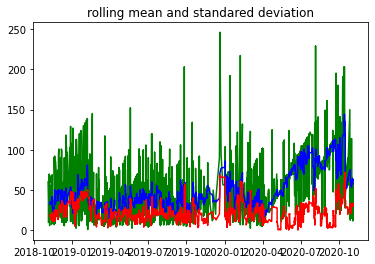

In [29]:
ts1.dropna()
test_stationary(ts1)

In [30]:
"Find the transformation using logs"
ts_log = np.log(ts1)

In [31]:
moving_avg = ts_log.rolling(12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna()

,y
ds,
2018-11-09,0.107485
2018-11-09,-0.624829
2018-11-09,-0.567067
2018-11-09,0.086914
2018-11-09,0.140675
...,...
2020-10-30,0.244283
2020-11-02,0.154465
2020-11-02,0.077613


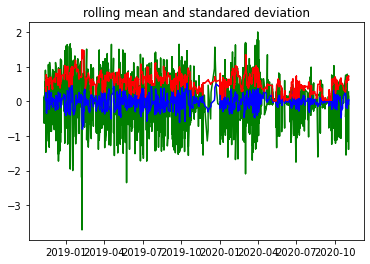

In [32]:
test_stationary(ts_log_moving_avg_diff)

In [ ]:
"it won't work for all the cases like complex "
"situation like sales forcasting we need intialize weights"

In [33]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna()

,y
ds,
2018-11-05,1.163151
2018-11-05,-0.470004
2018-11-05,1.115142
2018-11-06,-0.614366
2018-11-07,0.000000
...,...
2020-10-30,-0.531506
2020-11-02,-0.093819
2020-11-02,-0.033336


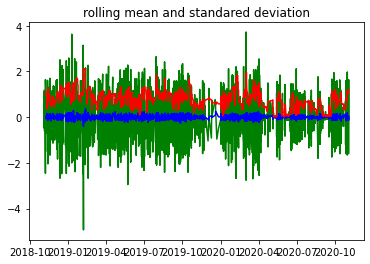

In [34]:
test_stationary(ts_log_diff)

In [54]:
from fbprophet import Prophet
model = Prophet()

ts.columns = ['ds', 'y']
ts.columns
ts = ts.sort_values(by = 'ds')

In [55]:
model.fit(ts)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
ts.dropna()

,ds,y
3433,01/02/2019,14
2308,01/02/2019,14
1714,01/02/2019,14
2483,01/02/2019,14
658,01/02/2019,16
...,...,...
551,12/31/2018,12
2448,12/31/2018,24
2456,12/31/2018,12
1785,12/31/2018,12


In [64]:
"Lets predict the future forcasting data"

future_values = model.make_future_dataframe(periods=360)

predict = model.predict(future_values)

In [62]:
predict.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-11-05,36.411054,9.367108,74.513026,36.411054,36.411054,7.047921,7.047921,7.047921,7.047921,7.047921,7.047921,0.0,0.0,0.0,43.458975
1,2018-11-06,36.349469,10.326078,75.088058,36.349469,36.349469,6.558403,6.558403,6.558403,6.558403,6.558403,6.558403,0.0,0.0,0.0,42.907871
2,2018-11-07,36.287884,7.558213,71.551828,36.287884,36.287884,4.016528,4.016528,4.016528,4.016528,4.016528,4.016528,0.0,0.0,0.0,40.304411
3,2018-11-08,36.226299,5.835968,71.066031,36.226299,36.226299,4.276708,4.276708,4.276708,4.276708,4.276708,4.276708,0.0,0.0,0.0,40.503007
4,2018-11-09,36.164714,7.755218,72.289652,36.164714,36.164714,3.443586,3.443586,3.443586,3.443586,3.443586,3.443586,0.0,0.0,0.0,39.608300


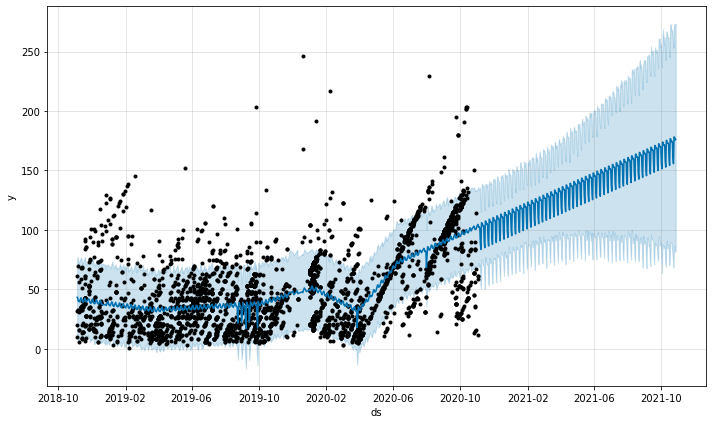

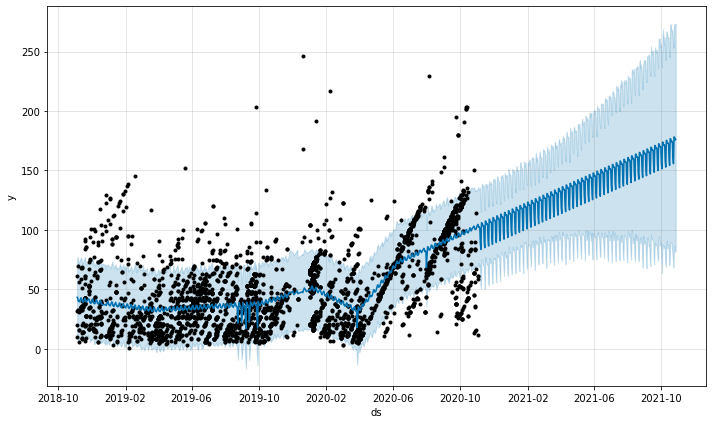

In [65]:
model.plot(predict)

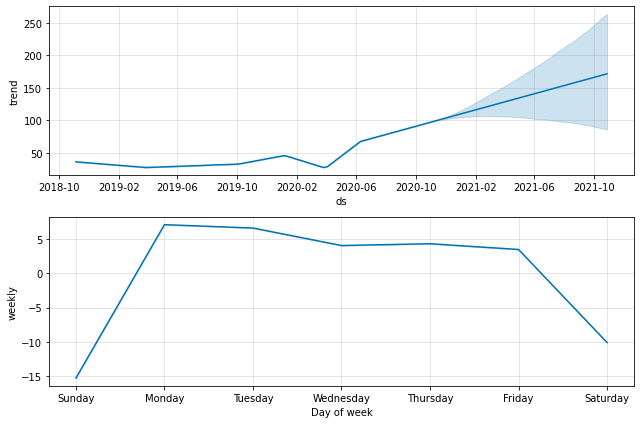

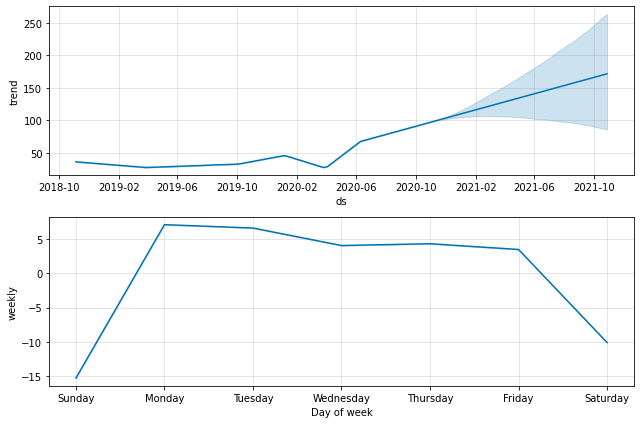

In [66]:
model.plot_components(predict)